In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from scipy import stats, integrate
#from sklearn.metrics import confusion_matrix, classification_report

LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'

In [4]:
df = pd.read_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, header=0)

In [5]:
#df.dtypes

In [6]:
df = df[df['Sold Price']<1000000]

In [7]:
df.dropna(subset=['Type'], inplace=True)
dummy_df = pd.get_dummies(df['Type'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Type', axis=1, inplace=True)

In [8]:
#df.head()

In [9]:
#df.dropna(subset=['Postcode_short'], inplace=True)
dummy_df = pd.get_dummies(df['Postcode_short'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Postcode_short', axis=1, inplace=True)

In [10]:
#df.head()

In [11]:
final_df=df[df['Sold Year']>=1998] #data prior to this has Nan

In [12]:
final_df.shape

(9576, 199)

In [13]:
final_df=final_df.dropna() #drop all rows with Nan

In [14]:
final_df.shape

(8663, 199)

In [15]:
final_df.head(5)

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
12,112995.0,1998,79997.5,63950.0,57995.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,130000.0,1998,149497.5,94000.0,77000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,118000.0,1998,102000.0,80000.0,81000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,121075.0,1999,112995.0,79997.5,63950.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,140000.0,1999,130000.0,149497.5,94000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_df=final_df[final_df['Sold Year']<=2010]
test_df=final_df[final_df['Sold Year']>2010]

In [17]:
train_df.shape

(5980, 199)

In [18]:
test_df.shape

(2683, 199)

In [19]:
X_train=train_df.drop(['Sold Price'],axis=1)
col_names = X_train.columns
X_train = np.array(X_train)
y_train=train_df['Sold Price'] 
y_train = np.array(y_train)

In [20]:
X_test=test_df.drop(['Sold Price'],axis=1)
X_test = np.array(X_test)
y_test=test_df['Sold Price'] 
y_test = np.array(y_test)

In [21]:
print(X_train.shape)
print(y_train.shape)

(5980, 198)
(5980,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(2683, 198)
(2683,)


In [23]:
model = DecisionTreeRegressor(min_samples_leaf=35, min_samples_split=10) 
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=35,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
y_pred = model.predict(X_test) #so putting X_test data through model to calc y predicted

In [25]:
y_actual = y_test #rename to make it easier to understand
mean_squared_error(y_actual, y_pred) 


16992207545.366987

0.669270475816


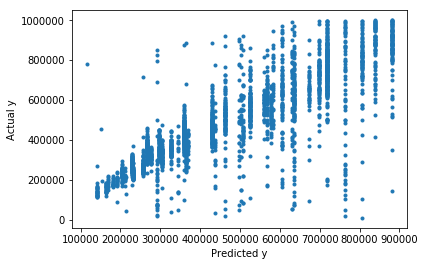

In [26]:
# Test R^2
print(model.score(X_test, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
#plt.gca().set_aspect('equal')
plt.show()
#output not that useful here

#about 4.4m competely out as puts it all in the same bucket thereafter

In [27]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = 296527.7027027027, Actual = 296687.5
Predicted = 461347.6509433962, Actual = 362000.0
Predicted = 429489.28571428574, Actual = 406500.0
Predicted = 296527.7027027027, Actual = 295000.0
Predicted = 503719.14285714284, Actual = 480000.0
Predicted = 429489.28571428574, Actual = 465000.0
Predicted = 296527.7027027027, Actual = 335000.0
Predicted = 461347.6509433962, Actual = 570000.0
Predicted = 296527.7027027027, Actual = 397500.0
Predicted = 524388.5869565217, Actual = 731250.0
Predicted = 358969.86842105264, Actual = 475000.0
Predicted = 697181.9166666666, Actual = 650000.0
Predicted = 461347.6509433962, Actual = 500000.0
Predicted = 838644.6578947369, Actual = 415000.0
Predicted = 804893.3984375, Actual = 719000.0
Predicted = 524388.5869565217, Actual = 518000.0
Predicted = 605624.125, Actual = 250000.0
Predicted = 718394.3684210526, Actual = 857500.0
Predicted = 277947.4358974359, Actual = 245000.0
Predicted = 163229.8108108108, Actual = 166100.0
Predicted = 256965.4761904

Predicted = 429489.28571428574, Actual = 550000.0
Predicted = 304778.53658536583, Actual = 337500.0
Predicted = 635293.3712121212, Actual = 120000.0
Predicted = 718394.3684210526, Actual = 827500.0
Predicted = 524388.5869565217, Actual = 480000.0
Predicted = 296527.7027027027, Actual = 447500.0
Predicted = 291095.1219512195, Actual = 25000.0
Predicted = 880433.3333333334, Actual = 810000.0
Predicted = 503719.14285714284, Actual = 550000.0
Predicted = 804893.3984375, Actual = 755000.0
Predicted = 256965.47619047618, Actual = 234500.0
Predicted = 559116.911111111, Actual = 530000.0
Predicted = 370653.6440677966, Actual = 388000.0
Predicted = 804893.3984375, Actual = 637500.0
Predicted = 228061.08974358975, Actual = 240000.0
Predicted = 578442.8571428572, Actual = 538750.0
Predicted = 429489.28571428574, Actual = 377500.0
Predicted = 804893.3984375, Actual = 722500.0
Predicted = 256965.47619047618, Actual = 245000.0
Predicted = 605624.125, Actual = 565000.0
Predicted = 429489.28571428574,

In [28]:
mean_absolute_error(y_actual, y_pred) 

85677.161035073863

In [29]:
list(zip(col_names, model.feature_importances_))

[('Sold Year', 0.0085497103701103194),
 ('Sold Price prev year', 0.82570301621072029),
 ('Sold Price prev year2', 0.14750524027814174),
 ('Sold Price prev year3', 0.017906712325776231),
 ('D', 0.00033208808227326564),
 ('F', 3.2327329780274731e-06),
 ('O', 0.0),
 ('S', 0.0),
 ('T', 0.0),
 ('E1', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0),
 ('E15', 0.0),
 ('E16', 0.0),
 ('E17', 0.0),
 ('E18', 0.0),
 ('E1W', 0.0),
 ('E2', 0.0),
 ('E20', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0),
 ('E6', 0.0),
 ('E7', 0.0),
 ('E8', 0.0),
 ('E9', 0.0),
 ('EC1A', 0.0),
 ('EC1M', 0.0),
 ('EC1N', 0.0),
 ('EC1R', 0.0),
 ('EC1V', 0.0),
 ('EC1Y', 0.0),
 ('EC2A', 0.0),
 ('EC2M', 0.0),
 ('EC2N', 0.0),
 ('EC2P', 0.0),
 ('EC2R', 0.0),
 ('EC2V', 0.0),
 ('EC2Y', 0.0),
 ('EC3A', 0.0),
 ('EC3M', 0.0),
 ('EC3N', 0.0),
 ('EC3R', 0.0),
 ('EC3V', 0.0),
 ('EC4A', 0.0),
 ('EC4M', 0.0),
 ('EC4N', 0.0),
 ('EC4R', 0.0),
 ('EC4V', 0.0),
 ('EC4Y', 0.0),
 ('EN3', 0.0),
 ('EN4', 0.0),
 ('EN5

#plt.bar(col_names, model.feature_importances_, align="center")
#plt.show()

#importances = pd.DataFrame({'feature':col_names,'importance':np.round(model.feature_importances_,3)})
importances = pd.DataFrame({'feature':col_names,'importance':model.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
%matplotlib inline 
print(importances)
importances.plot.bar()
#importances.plot.show()
#sns.barplot(y = col_names, x = importances)
#sns.barplot(x=df.reputation.value_counts().index, y=df.reputation.value_counts())


%matplotlib inline
sns.boxplot(y=model.feature_importances_, x=col_names)


features_importance=list(zip(col_names, model.feature_importances_))
plt.scatter(str(col_names), model.feature_importances_)
plt.show()

features = iris['feature_names']
>>> importances = rnd_clf.feature_importances_
>>> indices = np.argsort(importances)

>>> plt.title('Feature Importances')
>>> plt.barh(range(len(indices)), importances[indices], color='b', align='center')
>>> plt.yticks(range(len(indices)), features) ## removed [indices]
>>> plt.xlabel('Relative Importance')
>>> plt.show()

print(len(col_names))
print(len(model.feature_importances_))

type(col_names)
col_names
for x in col_names:
    print(x)

type(model.feature_importances_)
for x in model.feature_importances_:
    print(x)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

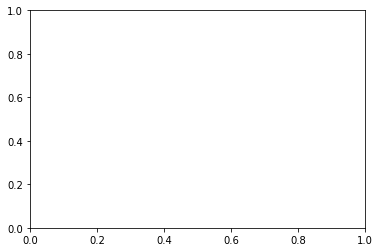

In [100]:
y=float(0.00854971037011),(0.825703016211),(0.147505240278),(0.0179067123258),(0.000332088082273)
x=['Sold Year','Sold Price prev year','Sold Price prev year2','Sold Price prev year3','D']
plt.bar(x,y)

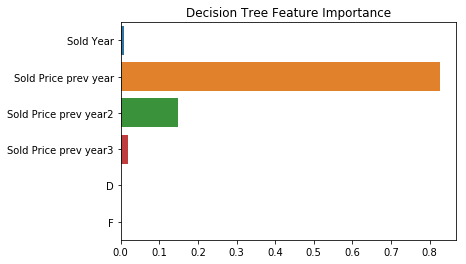

In [117]:
#print(model.feature_importances_)
#print(col_names)
#list(zip(col_names, model.feature_importances_))
sns.barplot(model.feature_importances_[:6],col_names[:6])
plt.title('Decision Tree Feature Importance')